In [1]:
import rasterio
from rasterio.features import geometry_mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
from shapely.geometry import box
from PIL import Image
import numpy as np

In [2]:
raster1_path = "/home/pedropeter/Documentos/PUC/Dissertação/Satellite_Imagens/Landsat_8/LC09_L1TP_228065_20221120_20221120_02_T1_B1.TIF"
raster2_path = "/home/pedropeter/Documentos/PUC/Dissertação/Satellite_Imagens/Sentinel_2/S2A_MSIL1C_20221210T140711_N0509_R110_T21MWN_20221210T155008.SAFE/GRANULE/L1C_T21MWN_A039003_20221210T140708/IMG_DATA/T21MWN_20221210T140711_B02.jp2"

In [2]:
raster1_path = '/run/media/pedropeter/DADOS/landsat.tif'
raster2_path = '/run/media/pedropeter/DADOS/sentinel.tif'

In [3]:
def reproject_raster(raster, dst_crs):
    """
    Reprojeta o CRS original do raster para o CRS informado.
    """
    transform, width, height = calculate_default_transform(
        raster.crs, dst_crs, raster.width, raster.height, *raster.bounds)

    kwargs = raster.meta.copy()

    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('/home/pedropeter/Documentos/teste.tif', 'w', **kwargs) as dst:
        for i in range(1, raster.count + 1):
            reproject(
                source=rasterio.band(raster, i),
                destination=rasterio.band(dst, i),
                src_transform=raster.transform,
                src_crs=raster.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

    raster.close()

    return rasterio.open('/home/pedropeter/Documentos/teste.tif')

In [4]:
def intersect_rasters(raster1_path, raster2_path):
    ras1 = rasterio.open(raster1_path)
    ras2 = rasterio.open(raster2_path)

    aux_ras = reproject_raster(ras2, ras1.crs)
    ras2.close()
    ras2 = aux_ras

    ext1 = box(*ras1.bounds)
    ext2 = box(*ras2.bounds)

    intersection = ext1.intersection(ext2)

    win1 = rasterio.windows.from_bounds(*intersection.bounds, ras1.transform)
    win2 = rasterio.windows.from_bounds(*intersection.bounds, ras2.transform)

    overlap_1 = ras1.read(window=win1)
    overlap_2 = ras2.read(window=win2)

    ras1.close()
    ras2.close()

    return (overlap_1, overlap_2)


In [10]:
overlap_1, overlap_2 = intersect_rasters(raster1_path, raster2_path)

In [6]:
with rasterio.open(raster1_path) as ras1, rasterio.open(raster2_path) as ras2:
    print(ras1.crs)
    print(ras2.crs)

    ras2 = reproject_raster(ras2, ras1.crs)

    print(ras1.crs)
    print(ras2.crs)

    ext1 = box(*ras1.bounds)
    ext2 = box(*ras2.bounds)

    print(ras1)

    intersection = ext1.intersection(ext2)

    print(intersection)
    win1 = rasterio.windows.from_bounds(*intersection.bounds, ras1.transform)
    win2 = rasterio.windows.from_bounds(*intersection.bounds, ras2.transform)

    overlap_1 = ras1.read(window=win1)
    overlap_2 = ras2.read(window=win2)

    print(type(overlap_1))
    print(overlap_2)

EPSG:32621
EPSG:32721
EPSG:32621
EPSG:32621
<open DatasetReader name='/run/media/pedropeter/DADOS/landsat.tif' mode='r'>
POLYGON ((499979.99999999965 -809759.9999999998, 499979.99999999965 -699959.9999999998, 609779.9999999998 -699959.9999999998, 609779.9999999998 -809759.9999999998, 499979.99999999965 -809759.9999999998))
<class 'numpy.ndarray'>
[[[1456. 1447. 1463. ... 1624. 1660. 1716.]
  [1480. 1462. 1464. ... 1647. 1784. 1883.]
  [1514. 1452. 1450. ... 1711. 1901. 1980.]
  ...
  [1384. 1388. 1386. ... 1377. 1375. 1411.]
  [1377. 1390. 1382. ... 1381. 1390. 1411.]
  [1389. 1380. 1375. ... 1391. 1378. 1397.]]

 [[1721. 1729. 1734. ... 1909. 1917. 1964.]
  [1739. 1754. 1761. ... 1943. 2010. 2121.]
  [1826. 1761. 1761. ... 1985. 2145. 2240.]
  ...
  [1723. 1729. 1680. ... 1697. 1672. 1704.]
  [1726. 1730. 1714. ... 1689. 1684. 1698.]
  [1703. 1714. 1690. ... 1699. 1714. 1697.]]

 [[1951. 1946. 1940. ... 2119. 2108. 2163.]
  [1950. 1954. 1945. ... 2113. 2162. 2265.]
  [1995. 1959. 1942

In [9]:
ras2.res

(10.000000000000005, 10.000000000000005)

In [10]:
ras1.res

(30.0, 30.0)

In [25]:
ras2.count

3

In [30]:
aux = rasterio.open(raster1_path)

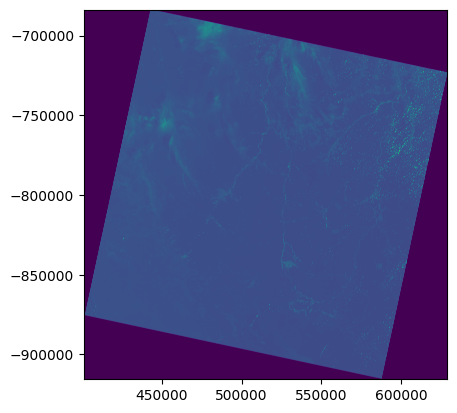

<AxesSubplot: >

In [32]:
from rasterio.plot import show

show((aux, 2))

In [12]:
print(overlap_1.reshape((3660, 3660, 3)).shape)

(3660, 3660, 3)


In [13]:
overlap_1.shape

(3, 3660, 3660)

In [20]:
overlap_2.shape

(3, 10980, 10980)

In [17]:
img = Image.fromarray(np.uint8(overlap_1.reshape((3660, 3660, 3)) * 255))
img.show()

In [23]:
img = Image.fromarray(np.uint8(overlap_2.reshape((10980, 10980, 3)) * 255))
# img.show()

In [24]:
img.save('teste.png')

In [43]:
from PIL import Image
import numpy as np

img1 = Image.fromarray(np.uint8(overlap_1.reshape((3660, 3660)) * 255) , 'L')
#img.show()

In [42]:
from PIL import Image
import numpy as np

img2 = Image.fromarray(np.uint8(overlap_2.reshape((10980, 10980)) * 255) , 'L')
#img.show()

In [45]:
ar1 = np.asarray(img1)
ar2 = np.asarray(img2)

In [61]:
lr_size = 128
total_steps = ar1.shape[0]/lr_size

crescendo = int(int(ras1.res[0]) / int(ras2.res[0]))

hr_size = lr_size * crescendo



In [62]:
images_per_axis = int(ar1.shape[0]/128)
count_slice = 1

for i in range(images_per_axis):
    for j in range(images_per_axis):
        slice1 = Image.fromarray(np.uint8(ar1[i*lr_size:(i+1)*lr_size, j*lr_size:(j+1)*lr_size]))
            
        slice2 = Image.fromarray(np.uint8(ar2[i*hr_size:(i+1)*hr_size, j*hr_size:(j+1)*hr_size]))

        slice1.save("tmp/lr/slice_{}.png".format(count_slice))
        slice2.save("tmp/hr/slice_{}.png".format(count_slice))
        
        count_slice = count_slice + 1
        
        

In [60]:
crescendo

3